In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load the wages dataset
wages = pd.read_csv("wages.csv")

# Display the first few rows
wages.head()

,Surname,Name,Age,Gender,Ethnicity,Start_date,Department,Position,Salary
0,Bold,Caroline,63,Female,White,7/2/2012,Executive Office,President & CEO,"$166,400.00"
1,Zamora,Jennifer,38,Female,White,4/10/2010,IT/IS,CIO,"$135,200.00"
2,Houlihan,Debra,51,Female,White,5/5/2014,Sales,Director of Sales,"$124,800.00"
3,Bramante,Elisa,34,Female,Black or African American,1/5/2009,Production,Director of Operations,"$124,800.00"
4,Del Bosque,Keyla,38,Female,Black or African American,1/9/2012,Software Engineering,Software Engineer,"$118,809.60"


<div class="alert alert-info">In a real-world scenario, handling missing values is crucial. 
However, for this activity, we will focus on exploratory analysis rather than data cleaning.</div>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Surname     174 non-null    object
 1   Name        174 non-null    object
 2   Age         174 non-null    int64 
 3   Gender      174 non-null    object
 4   Ethnicity   174 non-null    object
 5   Start_date  174 non-null    object
 6   Department  174 non-null    object
 7   Position    174 non-null    object
 8   Salary      174 non-null    object
dtypes: int64(1), object(8)
memory usage: 12.4+ KB
None

Summary Statistics:
              Age
count  174.000000
mean    37.793103
std      8.384734
min     25.000000
25%     31.000000
50%     36.000000
75%     43.000000
max     67.000000


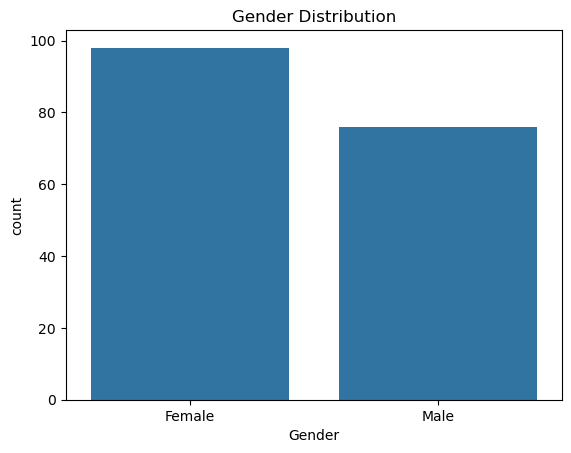

In [3]:
# Basic exploratory data analysis
print("Dataset Info:")
print(wages.info())

print("\nSummary Statistics:")
print(wages.describe())

# Visualizing gender distribution
sns.countplot(x='Gender', data=wages)
plt.title('Gender Distribution')
plt.show()

In [4]:
# Convert categorical columns to numerical
wages['Gender'] = wages['Gender'].astype('category').cat.codes
wages['Ethnicity'] = wages['Ethnicity'].astype('category').cat.codes
wages['Department'] = wages['Department'].astype('category').cat.codes
wages['Position'] = wages['Position'].astype('category').cat.codes

# Convert Salary to numeric (fixing escape sequence issue)
wages['Salary'] = wages['Salary'].replace(r'[\$,]', '', regex=True).astype(float)

# Convert Start_date to datetime
wages['Start_date'] = pd.to_datetime(wages['Start_date'])

# Extract year of start as a feature
wages['Start_Year'] = wages['Start_date'].dt.year

# Drop unnecessary columns
wages = wages.drop(columns=['Name', 'Surname', 'Start_date'])

# Display processed data
wages.head()

,Age,Gender,Ethnicity,Department,Position,Salary,Start_Year
0,63,0,4,1,13,166400.0,2012
1,38,0,4,2,3,135200.0,2010
2,51,0,4,4,6,124800.0,2014
3,34,0,1,3,5,124800.0,2009
4,38,0,1,5,19,118809.6,2012


In [5]:
# Simple predictive model (Example: Predicting Gender based on other features)
X = wages.drop(columns=['Gender'])
y = wages['Gender']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.60


**Analytical features**

In [6]:
#1. Compute Correlation Matrix
correlation_matrix = wages.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 Age    Gender  Ethnicity  Department  Position    Salary  \
Age         1.000000  0.052283   0.041433    0.060793  0.041492  0.030630   
Gender      0.052283  1.000000   0.046720    0.015232 -0.086232  0.095683   
Ethnicity   0.041433  0.046720   1.000000   -0.034363  0.017019 -0.013958   
Department  0.060793  0.015232  -0.034363    1.000000  0.043785  0.186618   
Position    0.041492 -0.086232   0.017019    0.043785  1.000000 -0.477306   
Salary      0.030630  0.095683  -0.013958    0.186618 -0.477306  1.000000   
Start_Year -0.053678  0.060871   0.166852   -0.123555  0.025195 -0.029008   

            Start_Year  
Age          -0.053678  
Gender        0.060871  
Ethnicity     0.166852  
Department   -0.123555  
Position      0.025195  
Salary       -0.029008  
Start_Year    1.000000  


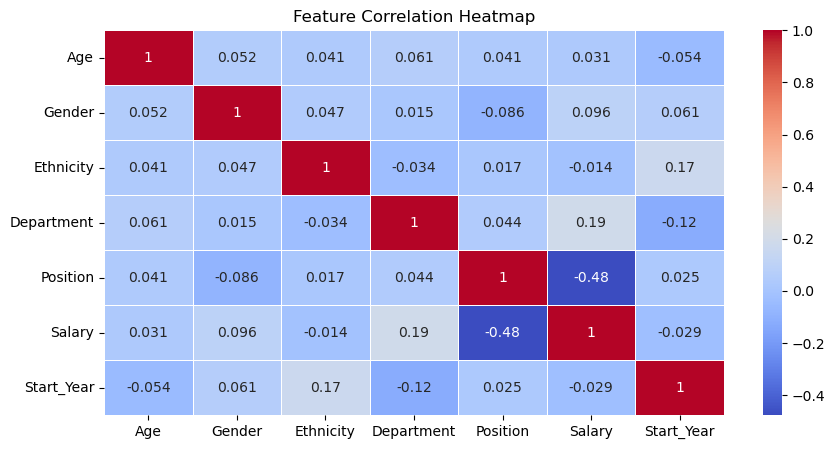

In [7]:
#2. Plot Heatmap of Correlation Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
#3. Top 5 highest wages
print("\nTop 5 Highest Wages:")
print(wages.nlargest(5, wages.columns[1]))


Top 5 Highest Wages:
     Age  Gender  Ethnicity  Department  Position    Salary  Start_Year
98    37       1          1           2         7  135200.0        2011
99    47       1          4           2        10  133120.0        2014
100   31       1          2           2         9  131040.0        2012
101   44       1          4           2         8  128960.0        2013
102   33       1          1           4        17  116480.0        2014


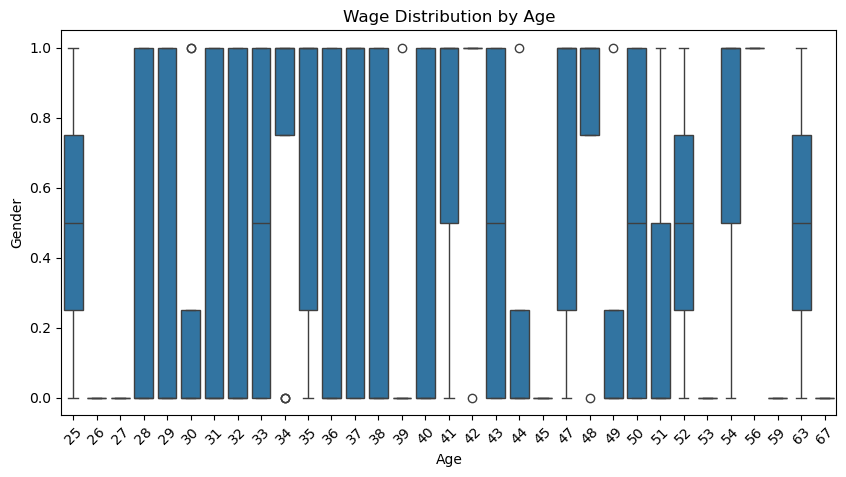

In [9]:
#4. Wage distribution by category
plt.figure(figsize=(10, 5))
sns.boxplot(x=wages.columns[0], y=wages.columns[1], data=wages)
plt.title("Wage Distribution by " + wages.columns[0])
plt.xticks(rotation=45)
plt.show()